# K-Means

In [1]:
!pip install kneed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df = pd.read_csv('../all_games.csv', encoding='utf-8')
df.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [5]:
df[df['user_review']=='tbd']

df = df.drop(df[df['user_review'] == 'tbd'].index)
df['user_review'] = df['user_review'].astype(np.float)

C:\Users\LUCASP~1\AppData\Local\Temp/ipykernel_20004/3843590146.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['user_review'] = df['user_review'].astype(np.float)


In [7]:
df['release_date'] = pd.to_datetime(df['release_date'])


In [8]:
df['year'] = df['release_date'].dt.year
df.head()

,name,platform,release_date,summary,meta_score,user_review,year
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998-11-23,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1,1998
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,As most major publishers' development efforts ...,98,7.4,2000
2,Grand Theft Auto IV,PlayStation 3,2008-04-29,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,2008
3,SoulCalibur,Dreamcast,1999-09-08,"This is a tale of souls and swords, transcendi...",98,8.4,1999
4,Grand Theft Auto IV,Xbox 360,2008-04-29,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,2008


In [9]:
data = df

In [10]:
df.drop('name', axis=1, inplace=True)
df.drop('platform', axis=1, inplace=True)
df.drop('release_date', axis=1, inplace=True)
df.drop('summary', axis=1, inplace=True)

In [12]:
df.drop('meta_score', axis=1, inplace=True)

In [13]:
df.head()

,user_review,year
0,9.1,1998
1,7.4,2000
2,7.7,2008
3,8.4,1999
4,7.9,2008


# K-Means

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from kneed import KneeLocator # detector de joelho/cotovelo da curva
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objs as go

In [16]:
mms = MinMaxScaler()
mms.fit(df)
transformed_data = mms.transform(df)
transformed_data

array([[0.93684211, 0.11538462],
       [0.75789474, 0.19230769],
       [0.78947368, 0.5       ],
       ...,
       [0.28421053, 0.76923077],
       [0.15789474, 0.65384615],
       [0.18947368, 0.53846154]])


K	Soma das distâncias quadráticas
1 	 1314.7132534522739
2 	 574.9932925738663
3 	 430.7808603110853
4 	 317.8101212269511
5 	 250.54045218450622
6 	 212.3591799354282
7 	 187.82481732402363
8 	 165.58363276534038
9 	 147.82412465016742
10 	 133.44942633997078
11 	 122.29473965304331
12 	 113.15378854765065
13 	 104.4368749287192
14 	 97.30321048403354


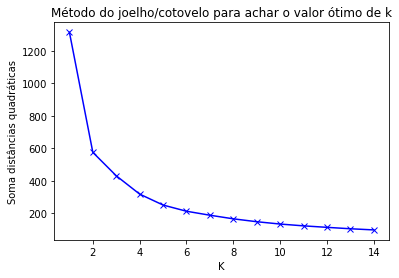

O método analítico informa que o joelho/cotovelo está em k = 4


In [17]:
soma_distancias_quadraticas = []
K = range(1, 15)
print('\nK\tSoma das distâncias quadráticas')
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(transformed_data)
    soma_distancias_quadraticas.append(km.inertia_)
    print(k, '\t', soma_distancias_quadraticas[k-1])
plt.plot(K, soma_distancias_quadraticas, 'bx-')
plt.xlabel('K')
plt.ylabel('Soma distâncias quadráticas')
plt.title('Método do joelho/cotovelo para achar o valor ótimo de k')
plt.show()
kl = KneeLocator(K, soma_distancias_quadraticas, curve="convex", direction="decreasing")
print('O método analítico informa que o joelho/cotovelo está em k =', kl.elbow)

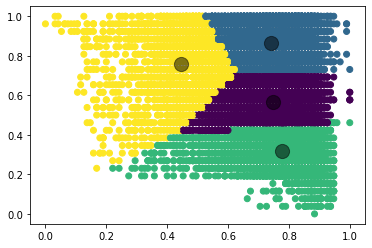

In [18]:
k = kl.elbow
km = KMeans(n_clusters=k, random_state=12)
km = km.fit(transformed_data)

predictions = km.predict(transformed_data)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=predictions, cmap='viridis')
centroides = km.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5)
plt.show()